## 洛仑兹吸引子

这三个方程定义了三维空间中各个坐标点上的速度矢量。从某个坐标开始沿着速度矢量进行积分，就可以计算出无质量点在此空间中的运动轨迹。其中sigma, rho, beta 为三个常数，不同的参数可以计算出不同的运动轨迹：x(t), y(t), z(t)。 当参数为某些值时，轨迹出现馄饨现象：即微小的初值差别也会显著地影响运动轨迹。


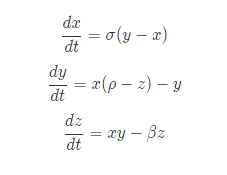

In [1]:
from scipy.integrate import odeint 
import numpy as np 

In [8]:
def lorenz(w, t, p, r, b): 
    # 给出位置矢量w，和三个参数p, r, b计算出
    # dx/dt, dy/dt, dz/dt的值
    x, y, z = w
    # 直接与lorenz的计算公式对应 
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z]) 


In [9]:
t = np.arange(0, 30, 0.01) # 创建时间点 
# 调用ode对lorenz进行求解, 用两个不同的初始值 
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0)) 
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0)) 

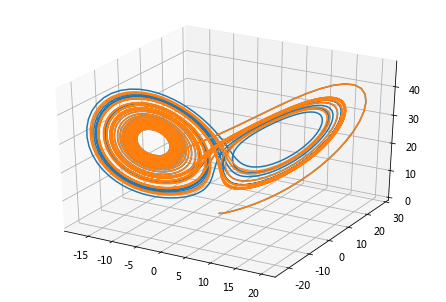

In [12]:
# 绘图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2])
ax.plot(track2[:,0], track2[:,1], track2[:,2])
plt.show()

 Examples
    --------
    The second order differential equation for the angle `theta` of a
    pendulum acted on by gravity with friction can be written::
    
        theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
    
    where `b` and `c` are positive constants, and a prime (') denotes a
    derivative.  To solve this equation with `odeint`, we must first convert
    it to a system of first order equations.  By defining the angular
    velocity ``omega(t) = theta'(t)``, we obtain the system::
    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
    
    Let `y` be the vector [`theta`, `omega`].  We implement this system
    in python as:
    
    >>> def pend(y, t, b, c):
    ...     theta, omega = y
    ...     dydt = [omega, -b*omega - c*np.sin(theta)]
    ...     return dydt
    ...
    
    We assume the constants are `b` = 0.25 and `c` = 5.0:
    
    >>> b = 0.25
    >>> c = 5.0
    
    For initial conditions, we assume the pendulum is nearly vertical
    with `theta(0)` = `pi` - 0.1, and is initially at rest, so
    `omega(0)` = 0.  Then the vector of initial conditions is
    
    >>> y0 = [np.pi - 0.1, 0.0]
    
    We will generate a solution at 101 evenly spaced samples in the interval
    0 <= `t` <= 10.  So our array of times is:
    
    >>> t = np.linspace(0, 10, 101)
    
    Call `odeint` to generate the solution.  To pass the parameters
    `b` and `c` to `pend`, we give them to `odeint` using the `args`
    argument.
    
    >>> from scipy.integrate import odeint
    >>> sol = odeint(pend, y0, t, args=(b, c))
    
    The solution is an array with shape (101, 2).  The first column
    is `theta(t)`, and the second is `omega(t)`.  The following code
    plots both components.
    
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
    >>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
    >>> plt.legend(loc='best')
    >>> plt.xlabel('t')
    >>> plt.grid()
    >>> plt.show()

In [17]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [18]:
b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))

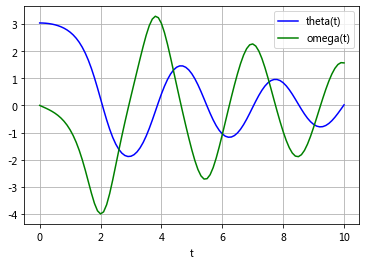

In [19]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()